# (6주차) 10월6일 
> 딥러닝의 기초 - 깊은신경망(2)-- 시벤코정리, MNIST with DNN

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 
> youtube: https://youtube.com/playlist?list=PLQqh36zP38-x9XuXWwAmKKI3JbTRoXVJA

## imports

In [168]:
import torch
import matplotlib.pyplot as plt
from fastai.data.all import * 
import torchvision

## 시벤코정리 

### 지난시간 논리전개

`-` 아이디어: linear -> relu -> linear (-> sigmoid) 조합으로 꺽은선으로 표현되는 underlying 을 표현할 수 있었다. 
- 아이디어의 실용성: 실제자료에서 꺽은선으로 표현되는 underlying은 몇개 없을 것 같음. 그건 맞는데 꺽이는 점을 많이 설정하면 얼추 비슷하게는 "근사" 시킬 수 있음. 
- 아이디어의 확장성: 이러한 논리전개는 X:(n,2)인 경우도 가능했음. (이 경우 꺽인선은 꺽인평면이 된다)
- 아이디어에 해당하는 용어정리: : 이 구조가 x->y 로 바로 가는 것이 아니라 x->(u1->v1)->(u2->v2)=y 의 구조인데 이러한 네트워크를 하나의 은닉층을 포함하는 네트워크라고 표현한다. 

### 시벤코정리

**universal approximation thm: (범용근사정리,보편근사정리,시벤코정리)**, 1989

> 하나의 은닉층을 가지는 "linear -> sigmoid -> linear" 꼴의 네트워크를 이용하여 세상에 존재하는 모든 (다차원) 연속함수를 원하는 정확도로 근사시킬 수 있다. (계수를 잘 추정한다면)


`-` 사실 엄청 이해안되는 정리임. 왜냐햐면,
- 그렇게 잘 맞추면 1989년에 세상의 모든 문제를 다 풀어야 한거 아니야? 
- 요즘은 "linear -> sigmoid -> linear" 가 아니라 "linear -> relu -> linear" 조합으로 많이 쓰던데? 
- 요즘은 하나의 은닉층을 포함하는 네트워크는 잘 안쓰지 않나? 은닉층이 여러개일수록 좋다고 어디서 본 것 같은데?

`-` 그래도 아무튼 현재단계에서는 이게 항상된다고 생각하자. 그러면 우리는 아래와 같은 무기를 가진 꼴이 된다. 
- 우리의 무기: ${\bf X}: (n,p)$ 꼴의 입력에서 ${\bf y}:(n,1)$ 꼴의 출력으로 향하는 맵핑을 "linear -> relu -> linear"와 같은 네트워크를 이용해서 "근사"시킬 수 있다.

## MNIST with DNN

### 목표 

`-` 목표: ${\bf X}:(n,1,28,28)$ 에서 $y:(n,1)$ 로 가는 맵핑을 학습하자 --> 배운적이 없는데? --> ${\bf X}:(n,784)$ 에서 $y:(n,1)$ 로 가는 맵핑을 학습하자.. 

### 예비학습1: Path

In [169]:
path = untar_data(URLs.MNIST) 
path

Path('/home/cgb4/.fastai/data/mnist_png')

- path 도 오브젝트임
- path 도 정보+기능이 있음 

`-` path의 정보

In [170]:
path._str # ㅎㅎ 숨겨놓았네?

'/home/cgb4/.fastai/data/mnist_png'

`-` 기능1

In [171]:
path.ls()

(#2) [Path('/home/cgb4/.fastai/data/mnist_png/training'),Path('/home/cgb4/.fastai/data/mnist_png/testing')]

`-` 기능2

In [172]:
path/'training'

Path('/home/cgb4/.fastai/data/mnist_png/training')

In [173]:
path/'testing'

Path('/home/cgb4/.fastai/data/mnist_png/testing')

`-` 기능1과 기능2의 결합

In [174]:
(path/'training/3').ls()

(#6131) [Path('/home/cgb4/.fastai/data/mnist_png/training/3/37912.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/12933.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/3576.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/59955.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/23144.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/40836.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/25536.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/42669.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/7046.png'),Path('/home/cgb4/.fastai/data/mnist_png/training/3/47380.png')...]

- '/home/cgb4/.fastai/data/mnist_png/training/3/37912.png' 이 파일을 더블클릭하면 이미지가 보인단 말임

### 예비학습2: plt.imshow 

In [175]:
imgtsr = torch.tensor([[1.0,2],[2.0,4.0]])
imgtsr

tensor([[1., 2.],
        [2., 4.]])

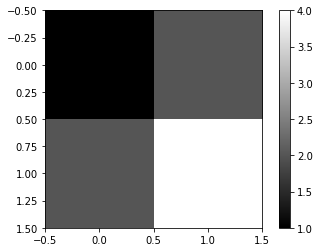

In [176]:
plt.imshow(imgtsr,cmap='gray')
plt.colorbar()

### 예비학습3: torchvision

`-` '/home/cgb4/.fastai/data/mnist_png/training/3/37912.png'의 이미지파일을 torchvision.io.read_image 를 이용하여 텐서로 만듬

In [177]:
imgtsr = torchvision.io.read_image('/home/cgb4/.fastai/data/mnist_png/training/3/37912.png')
imgtsr

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66, 138,
          149, 180, 138, 138,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

`-` 이 텐서는 (1,28,28)의 shape을 가짐

In [178]:
imgtsr.shape

torch.Size([1, 28, 28])

`-` imgtsr를 plt.imshow 로 시각화

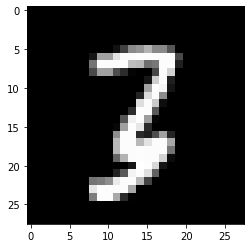

In [179]:
plt.imshow(imgtsr.reshape(28,28),cmap='gray')

- 진짜 숫자3이 있음 

### 데이터정리 

In [180]:
threes = (path/'training/3').ls()
sevens = (path/'training/7').ls()
len(threes),len(sevens)

(6131, 6265)

In [181]:
X3 = torch.stack([torchvision.io.read_image(str(threes[i])) for i in range(6131)])
X7 = torch.stack([torchvision.io.read_image(str(sevens[i])) for i in range(6265)])

In [182]:
X3.shape,X7.shape

(torch.Size([6131, 1, 28, 28]), torch.Size([6265, 1, 28, 28]))

In [183]:
X=torch.concat([X3,X7])
X.shape

torch.Size([12396, 1, 28, 28])

In [184]:
Xnp = X.reshape(-1,1*28*28).float()
Xnp.shape

torch.Size([12396, 784])

In [185]:
y = torch.tensor([0.0]*6131 + [1.0]*6265).reshape(-1,1) 
y.shape

torch.Size([12396, 1])

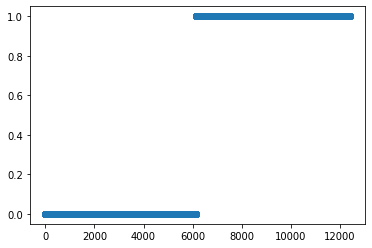

In [186]:
plt.plot(y,'o')

- "y=0"은 숫자3을 의미, "y=1"은 숫자7을 의미
- 숫자3은 6131개, 숫자7은 6265개 있음 

### 학습 (숙제: 스스로 확인해 볼 것) 

`-` 네트워크의 설계

In [187]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1*28*28,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)

- $\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,30)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,30)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [188]:
loss_fn = torch.nn.BCELoss()

In [189]:
optimizr = torch.optim.Adam(net.parameters())

In [190]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

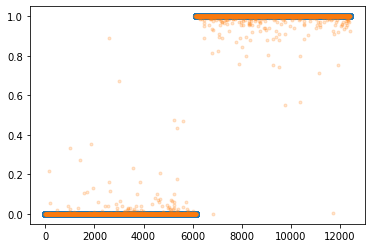

In [191]:
plt.plot(y,'o')
plt.plot(net(Xnp).data,'.',alpha=0.2)

- 대부분 잘 적합되었음 

## 숙제 

(1) 숫자0과 숫자1을 구분하는 네트워크를 아래와 같은 구조로 설계하라

$$\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,64)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,64)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

위에서 $a_1$은 relu를, $a_2$는 sigmoid를 의미한다. 

- "y=0"은 숫자0을 의미하도록 하고 "y=1"은 숫자1을 의미하도록 설정하라. 

(2) 아래의 지침에 따라 손실함수와 옵티마이저를 설정하고 200 epoch 학습을 진행하라.
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss() 를 이용할 것. 
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

(3) 아래의 지침에 따라 손실함수와 옵티마이저를 설정하고 200 epoch 학습을 진행하라. 학습이 잘 되는가? 
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

(4) 아래의 지침에 따라 손실함수와 옵티마이저를 설정하고 200 epoch 학습을 진행하라. 학습이 잘 되는가? 
- 이미지의 값을 0과 1사이로 규격화 하라. (Xnp = Xnp/255 를 이용하세요!)
- 손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
- 옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것. 

(5) 아래와 같은 수식을 이용하여 accuracy를 계산하라. 

$\text{accuracy}=\frac{1}{n}\sum_{i=1}^n I(\tilde{y}_i=y_i)$
- $\tilde{y}_i = \begin{cases}
 1 & \hat{y}_i > 0.5 \\ 
 0 & \hat{y}_i \leq 0.5 
\end{cases}$ 
- $I(\tilde{y}_i=y_i) = \begin{cases} 1 & \tilde{y}_i=y_i \\ 0 & \tilde{y}_i \neq y_i \end{cases}$

단, $n$은 0과 1을 의미하는 이미지의 수 